# Plotter (Master File)

### This is used to process 4 notebooks and get their values following the config file at once

In [8]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

: 

**Note: To avoid caching in the config file, always restart kernal when changing parameters.**

When you run the below, it must print some messages from the config.py other than what is printed below. 

If not, then restart kernel.

In [1]:
from utils import process_log_timestamps, process_log_tokens
from config import EXP_PATH, USE_TMY, SAVE_PLOTS

print(110*"-")
print("Use TMY: ", USE_TMY)
print("Save Plots: ", SAVE_PLOTS)


Configuration: 
LLM Model: microsoft/phi-4
LLM Generation: True
API key found!
Folder Path: demo
Experiment Path: demo/phi-4
Sub Experiment Path: demo/phi-4/TMY
--------------------------------------------------------------------------------------------------------------
Use TMY:  True
Save Plots:  True


### API Calls Durations and Tokens

#### API Calls Tokens

In [2]:
if True:
    print()
    print(110*"=")
    print("API Calls Tokens)")
    print(110*"=")
    for i in range(1, 5):
        try:
            logfile_path = f"{EXP_PATH}/logfile_l{i}.txt"

            if USE_TMY and (i == 2 or i == 3):
                continue
            
            if USE_TMY and i == 4:
                logfile_path = f"{EXP_PATH}/logfile_l{i}_tmy.txt"
            
            print(f"\nProcessing log file: {logfile_path}")
            Total_Usage_Prompt_Tokens, Total_Usage_Completion_Tokens = process_log_tokens(logfile_path)
            print(f"Total Usage Prompt Tokens: {Total_Usage_Prompt_Tokens}")
            print(f"Total Usage Completion Tokens: {Total_Usage_Completion_Tokens}")
            print(100*"-")
        except Exception as e:
            print(f"Error: {e}")
            continue


API Calls Tokens)

Processing log file: demo/phi-4/logfile_l1.txt
Total Usage Prompt Tokens: 462
Total Usage Completion Tokens: 136
----------------------------------------------------------------------------------------------------

Processing log file: demo/phi-4/logfile_l4_tmy.txt
Total Usage Prompt Tokens: 54316
Total Usage Completion Tokens: 41094
----------------------------------------------------------------------------------------------------


#### API Calls Duration

In [3]:
if True:
    print()
    print(110*"=")
    print("API Calls Duration)")
    print(110*"=")
    for i in range(1, 5):
        try:
            logfile_path = f"{EXP_PATH}/logfile_l{i}.txt"

            if USE_TMY and (i == 2 or i == 3):
                continue
            
            if USE_TMY and i == 4:
                logfile_path = f"{EXP_PATH}/logfile_l{i}_tmy.txt"
            
            print(f"\nProcessing log file: {logfile_path}")
            durations, total_duration, avg_duration = process_log_timestamps(logfile_path)

            if durations is not None:
                print("Durations between consecutive timestamps:")
                for i, duration in enumerate(durations):
                    print(f"  Duration {i + 1}: {duration}")
                print(f"Total Duration: {total_duration}")
                print(f"Average Duration: {avg_duration}")

            print(100*"-")
            # break
        except Exception as e:
            print(f"Error: {e}")
            continue


API Calls Duration)

Processing log file: demo/phi-4/logfile_l1.txt
Durations between consecutive timestamps:
  Duration 1: 0:00:04
Total Duration: 0:00:04
Average Duration: 0:00:04
----------------------------------------------------------------------------------------------------

Processing log file: demo/phi-4/logfile_l4_tmy.txt
Durations between consecutive timestamps:
  Duration 1: 0:00:27
  Duration 2: 0:00:29
  Duration 3: 0:00:26
  Duration 4: 0:00:29
  Duration 5: 0:00:27
  Duration 6: 0:00:29
  Duration 7: 0:00:28
  Duration 8: 0:00:32
  Duration 9: 0:00:26
  Duration 10: 0:00:24
  Duration 11: 0:00:25
  Duration 12: 0:00:23
  Duration 13: 0:00:43
  Duration 14: 0:00:43
  Duration 15: 0:00:38
  Duration 16: 0:00:32
  Duration 17: 0:00:34
  Duration 18: 0:00:41
  Duration 19: 0:00:31
  Duration 20: 0:00:32
  Duration 21: 0:00:36
  Duration 22: 0:00:31
  Duration 23: 0:00:28
  Duration 24: 0:00:30
Total Duration: 0:12:24
Average Duration: 0:00:31
-----------------------------

## Run the Plot Notebook

It saves the combined CSVs and plot the results and save them in the folder.

In [4]:
%run '02A_plot_llm_response.ipynb'

LLM Model Selected in Config.py is phi-4
Save Plots:  True
Combine Weather Plots:  True
demo/phi-4/data_l1_family_types/family_types_$COUNTRY$.json
Combined JSON saved to demo/phi-4/data_l1_family_types/selected_family_types.json
Available Countries: ['USA']
Weather by Country
  Country: USA -> Files: ['USA_Autumn.csv', 'USA_Winter.csv', 'USA_Spring.csv', 'USA_Summer.csv']
Combined CSV saved: demo/phi-4/data_l3_weather_by_season/TMY/combined_csv/USA_weather_combined.csv
Available Countries: ['USA']
Family Types by Country: {'USA': ['Nuclear Family', 'Single-Parent Family', 'Blended Family']}
Country: USA
  Family Type: Nuclear Family -> Files: ['USA_Nuclear-Family_Autumn_Weekday.csv', 'USA_Nuclear-Family_Winter_Weekday.csv', 'USA_Nuclear-Family_Winter_Weekend.csv', 'USA_Nuclear-Family_Autumn_Weekend.csv', 'USA_Nuclear-Family_Summer_Weekday.csv', 'USA_Nuclear-Family_Spring_Weekend.csv', 'USA_Nuclear-Family_Summer_Weekend.csv', 'USA_Nuclear-Family_Spring_Weekday.csv']
  Family Type: Sing

## Run the Base Dataframes Notebook

It saves the base dataframes for each country based on its holiday in the folder.

In [5]:
%run '02B_create_base_dataframes.ipynb'

LLM Model Selected in Config.py is phi-4
--------------------------------------------------------------------------------------------------------------
CSV file 'demo/phi-4/csv_yearly_profiles/time_data_1h_2025_base.csv' has been created.

Processing data for USA (US)
--------------------------------------------------------------------------------------------------------------
CSV file 'demo/phi-4/csv_yearly_profiles/time_data_1h_2025_US.csv' has been created.

[Sample] Country-Specific DataFrame for USA:


,datetime,year,quarter,month,week,day,day_name,hour,day_number,season,is_weekend,is_holiday,holiday_desc
0,2025-01-01 00:00:00,2025,1,1,1,1,WED,0,3,Winter,0,1,New Year's Day
1,2025-01-01 01:00:00,2025,1,1,1,1,WED,1,3,Winter,0,1,New Year's Day
2,2025-01-01 02:00:00,2025,1,1,1,1,WED,2,3,Winter,0,1,New Year's Day
3,2025-01-01 03:00:00,2025,1,1,1,1,WED,3,3,Winter,0,1,New Year's Day
4,2025-01-01 04:00:00,2025,1,1,1,1,WED,4,3,Winter,0,1,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2025-12-31 19:00:00,2025,4,12,1,31,WED,19,3,Winter,0,0,No Holiday
8756,2025-12-31 20:00:00,2025,4,12,1,31,WED,20,3,Winter,0,0,No Holiday
8757,2025-12-31 21:00:00,2025,4,12,1,31,WED,21,3,Winter,0,0,No Holiday
8758,2025-12-31 22:00:00,2025,4,12,1,31,WED,22,3,Winter,0,0,No Holiday


,datetime,year,quarter,month,week,day,day_name,hour,day_number,season,is_weekend,is_holiday,holiday_desc
0,2025-01-01,2025,1,1,1,1,WED,0,3,Winter,0,1,New Year's Day
1,2025-01-20,2025,1,1,4,20,MON,0,1,Winter,0,1,Martin Luther King Jr. Day
2,2025-02-17,2025,1,2,8,17,MON,0,1,Winter,0,1,Washington's Birthday
3,2025-05-26,2025,2,5,22,26,MON,0,1,Spring,0,1,Memorial Day
4,2025-06-19,2025,2,6,25,19,THU,0,4,Spring,0,1,Juneteenth National Independence Day
5,2025-07-04,2025,3,7,27,4,FRI,0,5,Summer,0,1,Independence Day
6,2025-09-01,2025,3,9,36,1,MON,0,1,Summer,0,1,Labor Day
7,2025-10-13,2025,4,10,42,13,MON,0,1,Autumn,0,1,Columbus Day
8,2025-11-11,2025,4,11,46,11,TUE,0,2,Autumn,0,1,Veterans Day
9,2025-11-27,2025,4,11,48,27,THU,0,4,Autumn,0,1,Thanksgiving


## Run the Yearly Expanded Dataframes Notebook

It saves the yearly-expanded dataframes for each country in the folder.

In [6]:
%run '02C_expand_to_yearly_dataframes.ipynb'


Processing data for USA (US)
	Created 'pattern' column in master_df.

Master File for US:
  Family Type: Nuclear Family
  Loaded: USA_Nuclear-Family_combined.csv
  Family Type: Single-Parent Family
  Loaded: USA_Single-Parent-Family_combined.csv
  Family Type: Blended Family
  Loaded: USA_Blended-Family_combined.csv

Processing data for USA (US)
	Created 'pattern' column in master_df.

Master File for US:
  Loaded: USA_weather_combined.csv


## Run the Plotter of the Energy Signature Notebook

It plots and saves the energy signature for each country in the folder.

Family CSV Mapping:


{'USA': {'Nuclear Family': ['demo/phi-4/TMY/csv_expanded_profile/USA_Nuclear-Family_expanded.csv'],
  'Single-Parent Family': ['demo/phi-4/TMY/csv_expanded_profile/USA_Single-Parent-Family_expanded.csv'],
  'Blended Family': ['demo/phi-4/TMY/csv_expanded_profile/USA_Blended-Family_expanded.csv']}}


Weather CSV Mapping


{'USA': ['demo/phi-4/TMY/csv_expanded_weather/USA_weather_expanded.csv']}


Processing country: USA
Weather data loaded for USA: demo/phi-4/TMY/csv_expanded_weather/USA_weather_expanded.csv
Combined data saved for USA - Nuclear Family: demo/phi-4/TMY/csv_profile_with_weather/USA_Nuclear-Family_combined.csv
Combined data saved for USA - Single-Parent Family: demo/phi-4/TMY/csv_profile_with_weather/USA_Single-Parent-Family_combined.csv
Combined data saved for USA - Blended Family: demo/phi-4/TMY/csv_profile_with_weather/USA_Blended-Family_combined.csv

Processing Country: USA


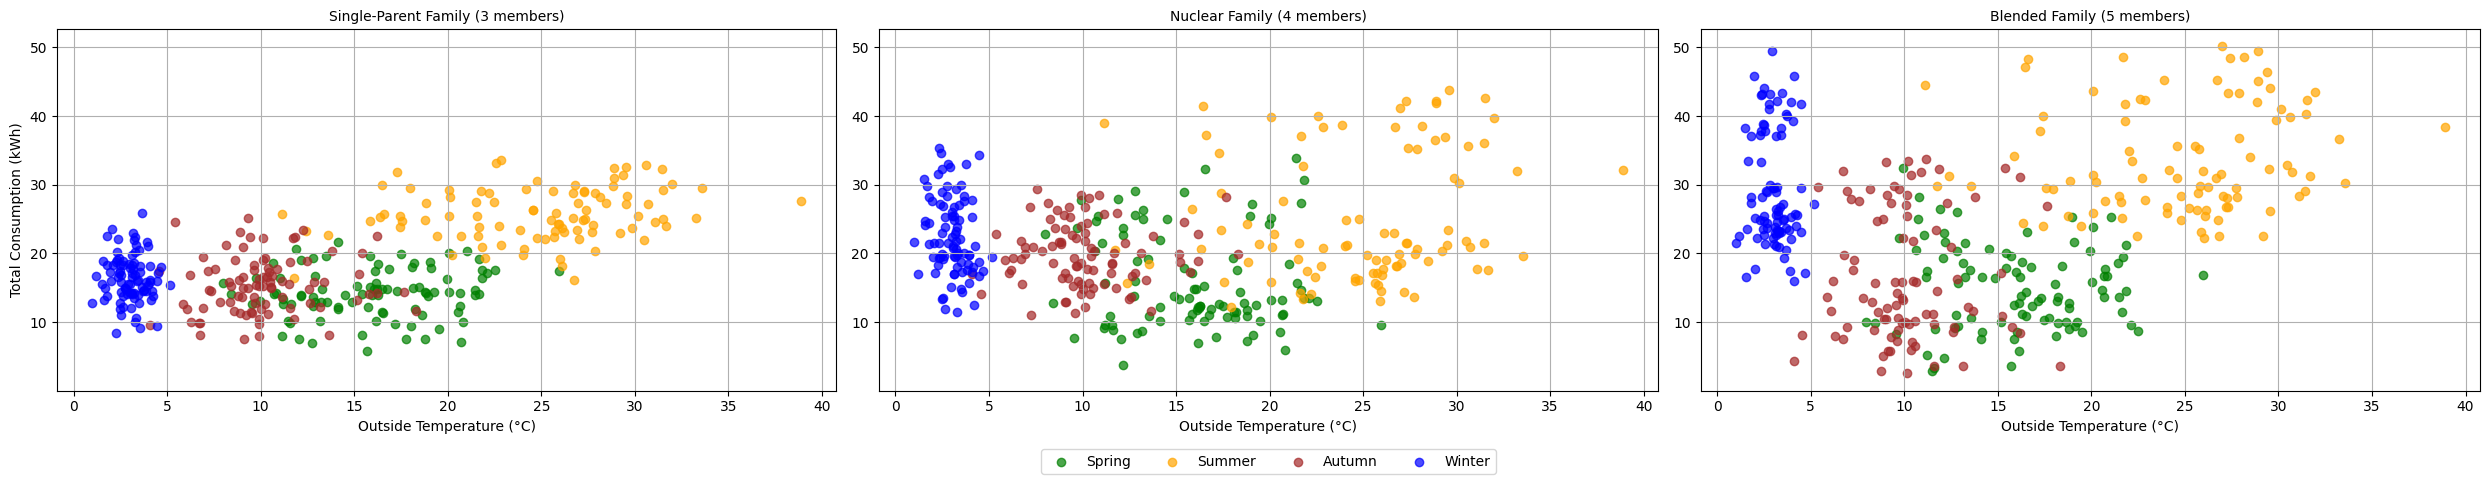

In [7]:
%run '02D_plot_energy_signatures.ipynb'